<a href="https://colab.research.google.com/github/varsha1n/chatbot/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to fetch the files , pickle library is used
#pickle library is used for serialization & de-serialization , converts text to byte stream & vice versa
#for pre-processing , numpy will be used

import pickle
import numpy as np

In [ ]:
# rb-read binary
# fp is file path

with open('train_qa220120145526-220818-175522.txt','rb') as fp:
    train_data = pickle.load(fp)

In [ ]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [ ]:
with open('test_qa220120145430-220818-175426.txt','rb') as fp:
    test_data = pickle.load(fp)

In [ ]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [ ]:
len(test_data)

1000

In [ ]:
len(train_data)

10000

In [ ]:
all_data=train_data + test_data

In [ ]:
len(all_data)

11000

In [ ]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
vocab=set()

In [ ]:
for story,question,answer in all_data:
  vocab=vocab.union(set(story))
  vocab=vocab.union(set(question))
  

In [ ]:
vocab.add('yes')  
vocab.add('no')



In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
len(vocab)

37

In [ ]:
#max_length of story,question for 11000 iterations
#we get max_legth for converting the data to matrix form
#data should be of equal length for matrix form , for which we will do batch sequenses(so padding of extra sequence)

In [ ]:
max_story_len=max(len(data[0]) for data in all_data)
max_story_len

156

In [ ]:
max_ques_len=max(len(data[1]) for data in all_data)
max_ques_len


6

In [ ]:
#pre-processing
#to make max_length equal ,we use following libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [ ]:
#tokenizer has class beased representation . so we are creating a object
tokenizer = Tokenizer(filters=[])

In [ ]:
# we are using tokenizer for indexing the vocab
tokenizer.fit_on_texts(vocab)

In [ ]:
tokenizer.word_index

{'got': 1,
 'back': 2,
 'is': 3,
 'took': 4,
 'down': 5,
 'kitchen': 6,
 'put': 7,
 'went': 8,
 'garden': 9,
 'journeyed': 10,
 '.': 11,
 'mary': 12,
 'picked': 13,
 'travelled': 14,
 'dropped': 15,
 'bathroom': 16,
 'discarded': 17,
 'sandra': 18,
 'grabbed': 19,
 'up': 20,
 'no': 21,
 'football': 22,
 'in': 23,
 'there': 24,
 'john': 25,
 'the': 26,
 'apple': 27,
 'milk': 28,
 'moved': 29,
 'office': 30,
 'hallway': 31,
 'to': 32,
 '?': 33,
 'daniel': 34,
 'left': 35,
 'bedroom': 36,
 'yes': 37}

In [ ]:
#seperate story,question,answer based on training & test
train_story_text=[]
train_question_text=[]

for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)


In [ ]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [ ]:
#to convert text to sequence
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [ ]:
train_story_seq

[[12, 29, 32, 26, 16, 11, 18, 10, 32, 26, 36, 11],
 [12,
  29,
  32,
  26,
  16,
  11,
  18,
  10,
  32,
  26,
  36,
  11,
  12,
  8,
  2,
  32,
  26,
  36,
  11,
  34,
  8,
  2,
  32,
  26,
  31,
  11],
 [12,
  29,
  32,
  26,
  16,
  11,
  18,
  10,
  32,
  26,
  36,
  11,
  12,
  8,
  2,
  32,
  26,
  36,
  11,
  34,
  8,
  2,
  32,
  26,
  31,
  11,
  18,
  8,
  32,
  26,
  6,
  11,
  34,
  8,
  2,
  32,
  26,
  16,
  11],
 [12,
  29,
  32,
  26,
  16,
  11,
  18,
  10,
  32,
  26,
  36,
  11,
  12,
  8,
  2,
  32,
  26,
  36,
  11,
  34,
  8,
  2,
  32,
  26,
  31,
  11,
  18,
  8,
  32,
  26,
  6,
  11,
  34,
  8,
  2,
  32,
  26,
  16,
  11,
  34,
  13,
  20,
  26,
  22,
  24,
  11,
  34,
  8,
  32,
  26,
  36,
  11],
 [12,
  29,
  32,
  26,
  16,
  11,
  18,
  10,
  32,
  26,
  36,
  11,
  12,
  8,
  2,
  32,
  26,
  36,
  11,
  34,
  8,
  2,
  32,
  26,
  31,
  11,
  18,
  8,
  32,
  26,
  6,
  11,
  34,
  8,
  2,
  32,
  26,
  16,
  11,
  34,
  13,
  20,
  26,
  22,
  24,
  1

In [ ]:
# vectorization-converting into machine understadable function
# for which we loop around for test & train set

def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_ques_len=max_ques_len):
  X=[]  #stories
  Xq=[] #queries/questions
  Y=[]  #answers

  for story,ques,answer in data:
    # making all letters to lower case
    x=[word_index[word.lower()] for word in story] 
    xq=[word_index[word.lower()] for word in ques]
    #creating series of zeros
    y=np.zeros(len(word_index) + 1)
    #  we are replacing yes with 1
    y[word_index[answer]]=1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

  #padding the sequences
  return (pad_sequences(X,maxlen =max_story_len),
          pad_sequences(Xq,maxlen=max_ques_len),
          np.array(Y))

In [ ]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)

In [ ]:
inputs_train

array([[ 0,  0,  0, ..., 26, 36, 11],
       [ 0,  0,  0, ..., 26, 31, 11],
       [ 0,  0,  0, ..., 26, 16, 11],
       ...,
       [ 0,  0,  0, ..., 26, 36, 11],
       [ 0,  0,  0, ..., 28, 24, 11],
       [ 0,  0,  0, ..., 27, 24, 11]], dtype=int32)

In [ ]:
inputs_test,queries_test,answers_test = vectorize_stories(test_data)


In [ ]:
# creating model

In [ ]:
from keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [ ]:
# creating sequences for giving as inputs

input_sequence=Input((max_story_len,))
question=Input((max_ques_len,))

In [ ]:
vocab_len=len(vocab)+1

In [ ]:
# encoding the input for questions

#creating sequential object
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len,output_dim =64))
input_encoder_m.add(Dropout(0.3))

In [ ]:
# encoding the input for stories

input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len,output_dim =max_ques_len))
input_encoder_c.add(Dropout(0.3))


In [ ]:
# encoding the questions
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len,output_dim =64,input_length=max_ques_len))
question_encoder.add(Dropout(0.3))

In [ ]:
# we are deploying the encoders , till now we havent given input
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [ ]:
# dot product
match=dot([input_encoded_m,question_encoded],axes=(2,2))
match =Activation('softmax')(match)

In [ ]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [ ]:
answer=concatenate([response,question_encoded])

In [ ]:
answer=LSTM(32)(answer)

In [ ]:
answer=Dropout(0.5)(answer)
answer=Dense(vocab_len)(answer)

In [ ]:
answer=Activation('softmax')(answer)

In [ ]:
model=Model([input_sequence,question],answer)
model.compile(optimizer = 'rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [ ]:
history = model.fit([inputs_train,queries_train],answers_train,batch_size=30,epochs=22,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/22
334/334 [==============================] - 6s 11ms/step - loss: 0.8826 - accuracy: 0.5001 - val_loss: 0.6952 - val_accuracy: 0.4970
Epoch 2/22
334/334 [==============================] - 3s 10ms/step - loss: 0.7018 - accuracy: 0.5069 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 3/22
334/334 [==============================] - 3s 9ms/step - loss: 0.6953 - accuracy: 0.5027 - val_loss: 0.6964 - val_accuracy: 0.5030
Epoch 4/22
334/334 [==============================] - 3s 9ms/step - loss: 0.6950 - accuracy: 0.4985 - val_loss: 0.6936 - val_accuracy: 0.4970
Epoch 5/22
334/334 [==============================] - 3s 9ms/step - loss: 0.6947 - accuracy: 0.4972 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 6/22
334/334 [==============================] - 3s 9ms/step - loss: 0.6948 - accuracy: 0.5003 - val_loss: 0.6944 - val_accuracy: 0.4970
Epoch 7/22
334/334 [==============================] - 3s 10ms/step - loss: 0.6945 - accuracy: 0.5040 - val_loss: 0.6952 - val_accuracy: 0.4970
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

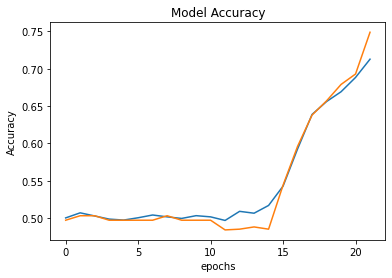

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")

In [ ]:
model.save("chatbot_model")

In [ ]:
# evaluation on test set
model.load_weights("chatbot_model")

In [ ]:
pred_results = model.predict(([inputs_test,queries_test]))

32/32 [==============================] - 0s 2ms/step


In [ ]:
val_max=np.argmax(pred_results[18])

for key,val in tokenizer.word_index.items():
  if val == val_max:
    k=key

print("predicted answer is",k)
print("probability of certainity",pred_results[18][val_max])

predicted answer is no
probability of certainity 0.86541575
